# Exploratory Data Analysis — Multi-Ticker Earnings Dataset

This notebook explores trends, distributions, and correlations among key engineered financial features such as **Return**, **Volatility**, **RSI**, and **Earnings Surprise %**.
The goal is to understand temporal dynamics, volatility behavior, and feature relationships before model training.

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

## 1️⃣ Load and Preprocess Data

We begin by importing the dataset and generating time-based attributes:

* **Year** and **Quarter** for annual and quarterly aggregation
* **YearMonth** for monthly resampling
  These columns allow temporal grouping and visualization of long-term trends in market behavior.

---

In [2]:
# Cell 2: Load and preprocess data
# Adjust path if needed
df = pd.read_csv("multi_ticker_earnings_dataset.csv", parse_dates=["Date"])
# Create time-based columns
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.to_period('Q')
df['YearMonth'] = df['Date'].dt.to_period('M')
# Set Date as index for resampling
df.set_index('Date', inplace=True)

## 2️⃣ Monthly Feature Trends Over Time

The plot below tracks the monthly mean values of **Return**, **Volatility**, **RSI**, and **Surprise %** from 2020 to 2025.

**Interpretation:**

* **RSI** values remain mostly between 40–60 and show cyclic oscillations typical of momentum indicators.
* **Volatility** exhibits moderate fluctuations, peaking during certain macro-events (e.g., 2022–2023).
* **Earnings Surprise %** spikes sharply in some quarters, suggesting sporadic outliers driven by exceptional earnings events.
* **Return** stays close to zero on average — consistent with aggregated market neutrality across tickers.

These patterns highlight that **RSI and Volatility are more stable predictors**, while **Surprise %** can inject high variance into models.

---

C:\Users\rahul\AppData\Local\Temp\ipykernel_13304\3733276742.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means = df[features].resample('M').mean()


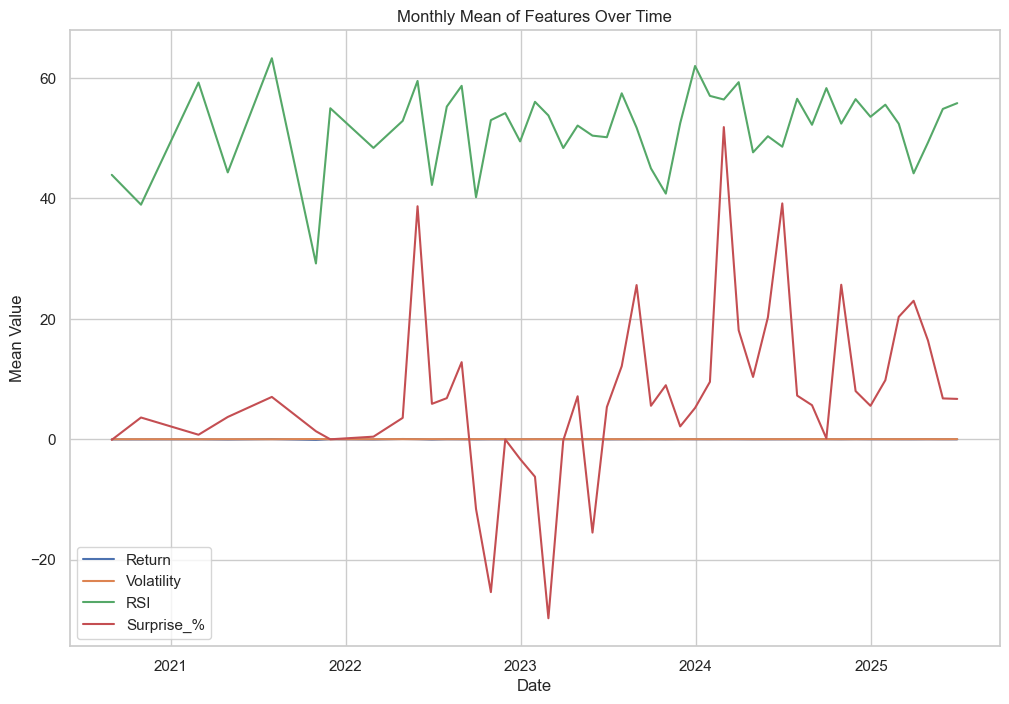

In [3]:
# Cell 3: Monthly mean time series for key features
features = ["Return", "Volatility", "RSI", "Surprise_%"]
monthly_means = df[features].resample('M').mean()
plt.figure(figsize=(12, 8))
for feat in features:
    sns.lineplot(data=monthly_means, x=monthly_means.index, y=feat, label=feat)
plt.title("Monthly Mean of Features Over Time")
plt.xlabel("Date")
plt.ylabel("Mean Value")
plt.legend()
plt.show()

## 3️⃣ Distribution of Volatility by Year

The yearly boxplots illustrate how volatility levels evolve over time.

**Observations:**

* Post-2021, median volatility roughly doubles compared to 2020, aligning with pandemic-to-recovery turbulence.
* 2022–2025 display heavier upper tails — indicating an increased frequency of high-volatility periods.
* Outliers remain consistent across years, showing that some extreme market events persist annually.

Overall, the **gradual widening of volatility spread** implies rising market uncertainty and stronger heteroskedasticity in returns.

---

C:\Users\rahul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\rahul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\rahul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to ge

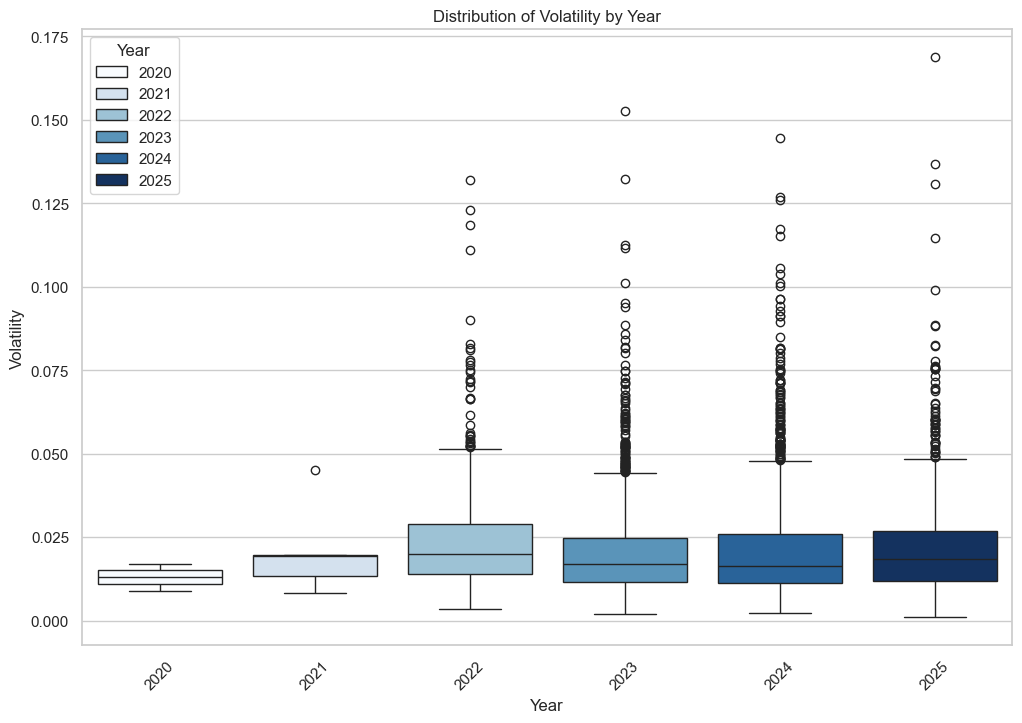

In [5]:
# Cell 4: Distribution of Volatility by Year
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.reset_index(), x='Year', y='Volatility', palette='Blues', hue='Year')
plt.title("Distribution of Volatility by Year")
plt.xlabel("Year")
plt.ylabel("Volatility")
plt.xticks(rotation=45)
plt.show()

## 4️⃣ RSI Distribution by Quarter

Quarterly violin plots reveal intra-year RSI movement and density.

**Insights:**

* Most RSI values cluster around 45–60, implying largely neutral to slightly bullish momentum.
* Certain quarters (notably 2021 Q3–Q4 and 2022 Q1) show widened tails, suggesting periods of overbought/oversold extremes.
* The distribution stabilizes post-2023, hinting at converging trader sentiment and reduced momentum volatility.

RSI thus maintains **predictive consistency**, but its quarterly variability could still capture cyclical behavioral patterns.

---

C:\Users\rahul\AppData\Local\Temp\ipykernel_13304\4840914.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df.reset_index(), x='Quarter', y='RSI', palette='Greens')


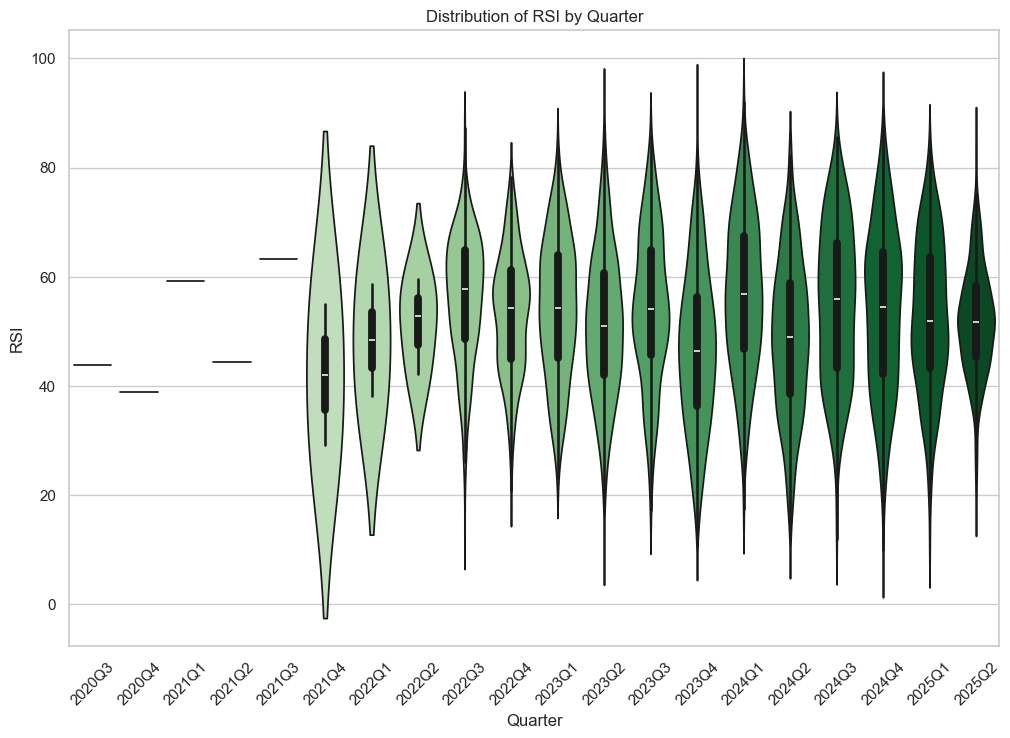

In [6]:
# Cell 5: Distribution of RSI by Quarter
plt.figure(figsize=(12, 8))
sns.violinplot(data=df.reset_index(), x='Quarter', y='RSI', palette='Greens')
plt.title("Distribution of RSI by Quarter")
plt.xlabel("Quarter")
plt.ylabel("RSI")
plt.xticks(rotation=45)
plt.show()

## 5️⃣ Earnings Surprise % by Year

Year-wise boxplots highlight the dispersion of analyst earnings surprises.

**Interpretation:**

* The central tendency hovers near zero, as expected — most companies meet or narrowly beat expectations.
* However, outliers exceed ±5000 %, reflecting isolated reporting anomalies or low-denominator effects.
* Extreme spikes occur after 2022, possibly linked to post-pandemic sector rebounds.

This indicates that **Earnings Surprise %** should be carefully normalized or winsorized before inclusion in predictive models.

---

C:\Users\rahul\AppData\Local\Temp\ipykernel_13304\2888076902.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df.reset_index(), x='Year', y='Surprise_%', palette='Oranges')
C:\Users\rahul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\rahul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pa

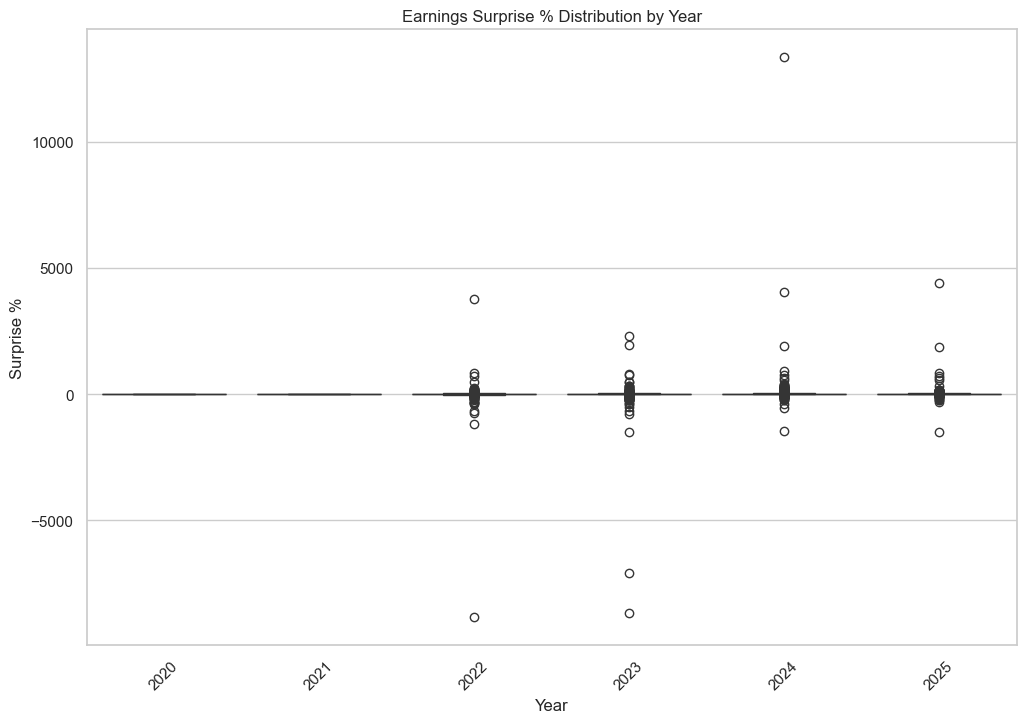

In [7]:

# Cell 6: Earnings Surprise % Distribution by Year
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.reset_index(), x='Year', y='Surprise_%', palette='Oranges')
plt.title("Earnings Surprise % Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Surprise %")
plt.xticks(rotation=45)
plt.show()

## 6️⃣ Feature Correlation Matrix

A correlation heatmap summarizes linear relationships among the engineered indicators.

**Key Correlations:**

* **Return ↔ Momentum3 (0.89)** — strong positive relationship, confirming that Momentum3 effectively encodes short-term price dynamics.
* **RSI ↔ Momentum3 (0.71)** and **Return ↔ RSI (0.65)** — reinforces RSI’s close connection to recent momentum and returns.
* **Volatility** shows weak correlations with other metrics, implying it captures independent risk information.
* **ATR14** remains mostly orthogonal to other predictors, adding distinct variability related to price range.

These insights validate that the **feature set spans complementary market aspects** — momentum, risk, and sentiment — providing a balanced foundation for subsequent machine-learning models.

---

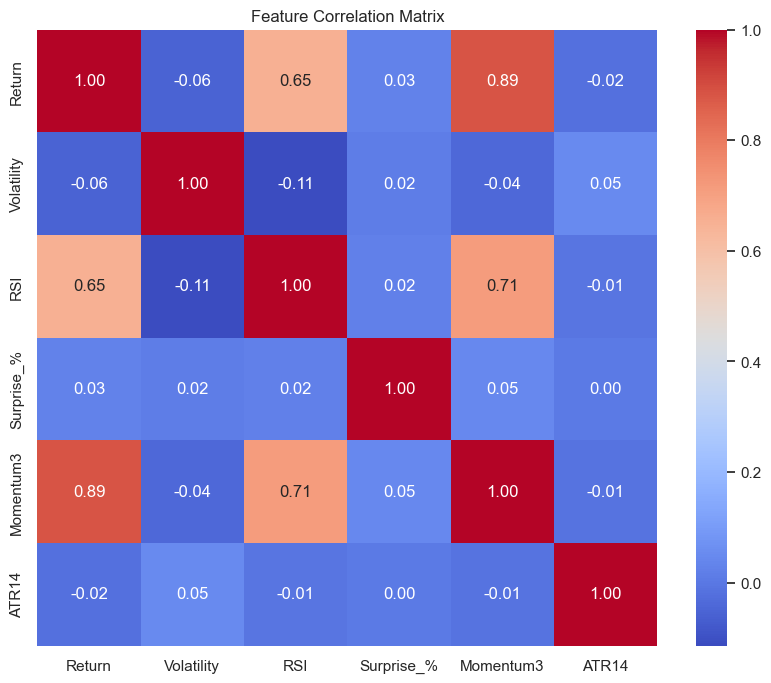

In [8]:
# Cell 7: Correlation Heatmap Over Entire Period
corr = df[features + ['Momentum3', 'ATR14']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

## ✅ Summary

Through this EDA:

* We observed temporal stability in RSI and Volatility but high kurtosis in Surprise %.
* Feature inter-correlations suggest that price-based and volatility-based signals contribute unique information.
* Certain variables (e.g., Surprise %) may need transformation or scaling to mitigate outlier influence.

Next, we proceed to **feature selection and model training**, leveraging these insights to inform preprocessing and model design.
